
<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>

# <center>  Aprendizaje No Supervisado: Clustering </center>

## Descripción
En esta lección se abordan los algoritmos de clusterización: K-Means e Hierarchical clustering

## Contenido
* Importación de librerias y módulos
* Carga dataset de trabajo
* Análisis exploratorio de datos
* Clusterización

## Requisitos previos

* Haber completado los cursos:
  - Introducción a Python
  - Estadística para Ciencia de Datos
  - Introducción a Machine Learning

<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

### Importar librerías y verificar versiones

In [4]:
import sys
import datetime as dt
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns

print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Scikit-learn:', sk.__version__)

Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
NumPy: 1.21.6
Pandas: 1.3.5
Seaborn: 0.11.2
Matplotlib: 3.2.2
Scikit-learn: 1.0.2


## 1. Importar módulos específicos de librerías

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

## 2. Dataset de Trabajo

**df_retail:** Este conjunto de datos contiene todas las transacciones que ocurren para un minorista en línea (online) registrado en el Reino Unido entre el 2010-12-01 y el 2011-12-09. La compañía vende principalmente artículos de regalo únicos para toda ocasión. Muchos clientes de la empresa son mayoristas.

<a href='https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/OnlineRetail.csv'>
  Link para descargar el dataset OnlineRetail</a>

**Objetivo del Clustering:** Segmentar a los clientes de la tienda online de acuerdo a los criterios de recencia, frecuencia y monto (RFM), para que la empresa pueda identificar a los clientes en base a estas características y realizar una campaña de marketing focalizada

**Diccionario de datos**

1. InvoiceNo: número de factura. Tipo nominal. Un número integral de 6 dígitos asignado exclusivamente a cada transacción. Si este código comienza con la letra **'C'**, indica una cancelación.
2. StockCode: código de producto (artículo). Tipo Nominal. Un número integral de 5 dígitos asignado exclusivamente a cada producto distinto.
3. Description: Nombre del producto (artículo). Tipo Nominal.
4. Quantity: las cantidades de cada producto (artículo) por transacción. Tipo Numérico.
5. InvoiceDate: fecha y hora de inicio. Tipo Date. El día y la hora en que se generó una transacción.
6. UnitPrice: precio unitario. Tipo Numérico. Precio del producto por unidad en libras esterlinas (£).
7. CustomerID: número de cliente. Tipo Nominal. Un número integral de 5 dígitos asignado exclusivamente a cada cliente.
8. Country: nombre del país. Tipo Nominal. El nombre del país donde reside el cliente.

In [50]:
ruta='https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/OnlineRetail.csv'

In [51]:
# Carga dataset
df_retail = pd.read_csv(ruta, encoding = 'ISO-8859-1', header = 0)#
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [52]:
# Examinar número de filas y columnas
df_retail.shape

(541909, 8)

In [53]:
# Analizar el tipo de datos de cada variable
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Se comprueba que algunas columnas poseen un tipo incorrecto conforme a nuestro diccionario de datos ([revisa aqui los formatos para fechas](https://docs.python.org/2.6/library/datetime.html#strftime-strptime-behavior))

In [54]:
# Transformar a columnas a formatos correctos de acuerdo al diccionario de datos
df_retail['CustomerID'] = df_retail['CustomerID'].astype(str)
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'], format = '%d-%m-%Y %H:%M')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

## 3. Análisis exploratorio de datos

In [56]:
df_retail.describe(include = np.number)

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


Al revisar la calidad de los datos en las variables `Quantity` y `UnitPrice`, se evidencian valores negativos. Por conocimiento del negocio se sabe que si el `InvoceNo` comienza por la letra `C` significa que fue una cancelación.

In [57]:
df_retail.loc[df_retail['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [58]:
df_retail.loc[df_retail['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,nan,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,nan,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,nan,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,nan,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,nan,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,nan,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,nan,United Kingdom


Se procede a filtar aquellas filas en ambas columnas que poseen valores mayores a cero

In [65]:
df_retail_fitrado = df_retail.loc[(df_retail['Quantity'] > 0) & (df_retail['UnitPrice'] > 0)].copy()
df_retail_fitrado.shape

(530104, 8)

Calcular la proporción de valores faltantes por columna

In [66]:
df_retail_fitrado.isnull().sum() / len(df_retail_fitrado)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### 3.1 Transformaciones para el análisis RFM

In [67]:
# Calcular el monto de las ventas (precio * cantidad)
df_retail_fitrado['Total_Sales'] = df_retail_fitrado['Quantity'] * df_retail_fitrado['UnitPrice']
df_retail_fitrado.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [68]:
# Cálculo para la recencia: Guardamos la fecha de la última transacción
fecha_max = df_retail_fitrado['InvoiceDate'].max()
fecha_max

Timestamp('2011-12-09 12:50:00')

In [69]:
# Calcular la diferencia entre la fecha de la última transacción y la fecha que se realizó la transacción
df_retail_fitrado['Date_difference'] = fecha_max - df_retail_fitrado['InvoiceDate']
print(fecha_max - df_retail_fitrado['InvoiceDate'][1])
#Convertir en número de días usando datetime
df_retail_fitrado['Date_difference'] = df_retail_fitrado['Date_difference'].dt.days
df_retail_fitrado['Date_difference'].head()

373 days 04:24:00


0    373
1    373
2    373
3    373
4    373
Name: Date_difference, dtype: int64

Procedemos a realizar el agrupamiento por cliente de acuerdo a la columna CustomerID siguiendo la siguiente lógica para el análisis de RFM:
- Monto: Sumatoria de las ventas totales
- Frecuencia: Conteo de la cantidad de procesos facturados
- Recencia: Mínimo número de días desde que realizó una transacción con respecto a la fecha de corte

In [70]:
# Agrupar clientes por Monto, Frecuencia y Recencia
df_rfm = df_retail_fitrado.groupby('CustomerID').agg({'Total_Sales': 'sum', 'Quantity': 'count', 'Date_difference': 'min'})
df_rfm.head()

,Total_Sales,Quantity,Date_difference
CustomerID,,,
12346.0,77183.60,1,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b763c9990>,
      dtype=object)

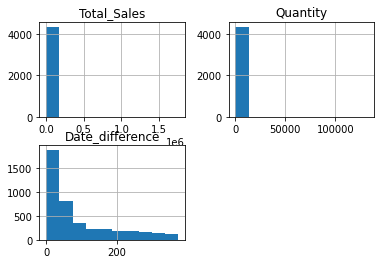

In [71]:
#fig, axs = plt.figure(figsize=(10,10))
df_rfm.hist()

In [22]:
df_rfm.shape

(4339, 3)

In [72]:
# Renombrar columnas
df_rfm.rename(columns = {'Total_Sales': 'Monto', 'Quantity': 'Frecuencia', 'Date_difference': 'Recencia'}, inplace = True)
df_rfm.columns

Index(['Monto', 'Frecuencia', 'Recencia'], dtype='object')

### 3.2 Análisis de valores atípicos

Aplicar la visualización box-plot para cada columna del dataframe:

In [73]:
display(df_rfm)

,Monto,Frecuencia,Recencia
CustomerID,,,
12346.0,77183.60,1,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18281.0,80.82,7,180
18282.0,178.05,12,7
18283.0,2094.88,756,3


In [74]:
# Remover los outliers para la Recencia
Q1 = df_rfm.Recencia.quantile(0.25)
Q3 = df_rfm.Recencia.quantile(0.75)
IQR = Q3 - Q1
df_limpio_rec = df_rfm[(df_rfm.Recencia >= Q1 - 1.5*IQR) & (df_rfm.Recencia <= Q3 + 1.5*IQR)].copy()
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

-169.0 327.0


In [75]:
# Remover los outliers para la Frecuencia
Q1 = df_limpio_rec.Frecuencia.quantile(0.25)
Q3 = df_limpio_rec.Frecuencia.quantile(0.75)
IQR = Q3 - Q1
df_limpio_frec = df_limpio_rec[(df_limpio_rec.Frecuencia >= Q1 - 1.5*IQR) & (df_limpio_rec.Frecuencia <= Q3 + 1.5*IQR)].copy()
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

-109.5 230.5


In [76]:
# Remover los outliers para la Monto
Q1 = df_limpio_frec.Monto.quantile(0.25)
Q3 = df_limpio_frec.Monto.quantile(0.75)
IQR = Q3 - Q1
df_limpio_final = df_limpio_frec[(df_limpio_frec.Monto >= Q1 - 1.5*IQR) & (df_limpio_frec.Monto <= Q3 + 1.5*IQR)].copy()
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

-1273.53125 2928.21875


In [77]:
df_limpio_final.shape

(3504, 3)

### 3.3  Visualización descriptiva del DataFrame

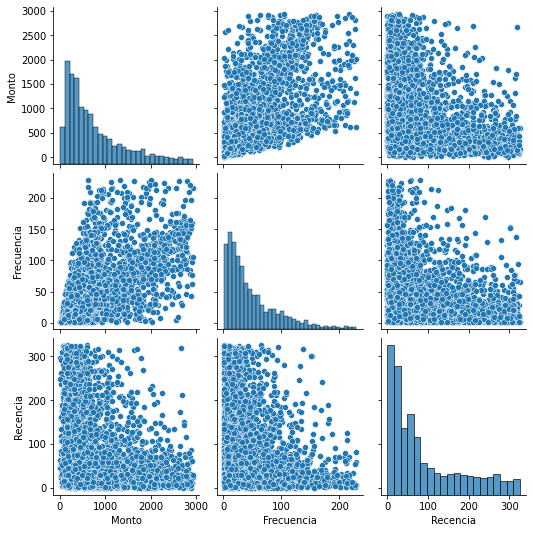

In [29]:
sns.pairplot(df_limpio_final)

### 3.4 Escalamiento de los datos

In [87]:
print(df_limpio_final.dtypes)
rfm_escalado = StandardScaler().fit_transform(df_limpio_final)
rfm_escalado

Monto         float64
Frecuencia      int64
Recencia        int64
dtype: object


array([[ 1.52405355, -0.39826977, -0.20202967],
       [ 1.4646896 ,  0.51679377, -0.82480002],
       [-0.66390237, -0.70329094,  2.41138163],
       ...,
       [-1.04317957, -0.92116322,  0.97678564],
       [-0.89775358, -0.81222708, -0.94712991],
       [ 1.583941  ,  0.45143209, -0.55789844]])

In [31]:
type(rfm_escalado)

numpy.ndarray

## 4. Clusterización

Se analizará dos algoritmos para realizar el proceso de agrupamientos de las observaciones

### 4. K-Means Clustering

Usando Scikit-learn, debemos primero importar la instancia de ```sklearn.cluster.KMeans```, e invocar los métodos necesarios:

1. Preparar los datos X
2. Crear instancia de ```sklearn.cluster.KMeans```:

``` python
km = KMeans(n_clusters = 3, 
            init       = "k-means++",
            n_jobs     = 4, 
            random_state = 0
           )
```
3. Entrenar:
```
km.fit(X)
```
4. Identificar etiquetas de clasificación:
```
km.labels_
```

A continuación describiremos los argumentos más comunes:


---
**```sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)[source]```**

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [32]:
# Para encontrar el número óptimo de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', #selecciona los centroides de los clústeres iniciales de una manera inteligente para acelerar la convergencia
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 0)
    kmeans.fit(rfm_escalado)
    wcss.append(kmeans.inertia_)

In [33]:
#Crear un dataframe con la métrica de evaluación y el número de clústeres
numero_clusteres = list(enumerate(wcss, start = 1))
metrica_wcss = np.array(numero_clusteres)
df_wcss= pd.DataFrame(data = metrica_wcss, columns = ['CLUSTERS','WCSS'], index = range(1, 11))
df_wcss

,CLUSTERS,WCSS
1,1.0,10512.000000
2,2.0,5963.466261
3,3.0,3660.237848
4,4.0,2938.037690
5,5.0,2443.217722
6,6.0,2168.908502
7,7.0,1918.004296
8,8.0,1734.905106
9,9.0,1557.329495
10,10.0,1439.907049


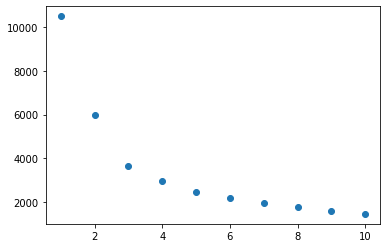

In [34]:
plt.scatter(df_wcss.CLUSTERS, df_wcss.WCSS)

El número óptimo de clusters está dado por el lugar de ocurrencia del "codo" (elbow), evaluando un gráfico de línea:

In [35]:
display(df_wcss)

,CLUSTERS,WCSS
1,1.0,10512.000000
2,2.0,5963.466261
3,3.0,3660.237848
4,4.0,2938.037690
5,5.0,2443.217722
6,6.0,2168.908502
7,7.0,1918.004296
8,8.0,1734.905106
9,9.0,1557.329495
10,10.0,1439.907049


Aplicamos KMeans con el número de clústers óptimo

In [36]:
kmeans = KMeans(n_clusters = 2, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)

kmeans.fit(rfm_escalado)

KMeans(n_clusters=2, random_state=0)

In [37]:
# Inercia: Suma de los cuadrados de las distancias de las observaciones respecto de sus centros
kmeans.inertia_

5963.466260979592

In [38]:
# Guardamos las etiquetas de cada cliente (cada clúster)
etiquetas = kmeans.labels_
etiquetas

array([0, 0, 1, ..., 1, 1, 0], dtype=int32)

**Visualización por cluster**

In [39]:
# Creación de una nueva columna en el dataframe con las etiquetas
df_limpio_final['Cluster_kmeans'] = etiquetas
df_limpio_final.head()

,Monto,Frecuencia,Recencia,Cluster_kmeans
CustomerID,,,,
12348.0,1797.24,31,74,0
12349.0,1757.55,73,18,0
12350.0,334.40,17,309,1
12352.0,2506.04,85,35,0
12353.0,89.00,4,203,1


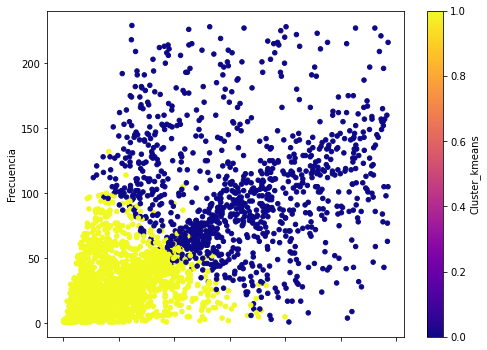

In [40]:
# Grafico de dispersión
df_limpio_final.plot.scatter(x='Monto', y='Frecuencia', c='Cluster_kmeans', colormap='plasma', figsize=(8,6))

3660.237848137438
[[-0.33251173 -0.34576769 -0.48140032]
 [ 1.39414549  1.40046205 -0.56397694]
 [-0.58917606 -0.56739436  1.52008473]]
[[-0.48140032]
 [-0.56397694]
 [ 1.52008473]]
[[-0.34576769]
 [ 1.40046205]
 [-0.56739436]]


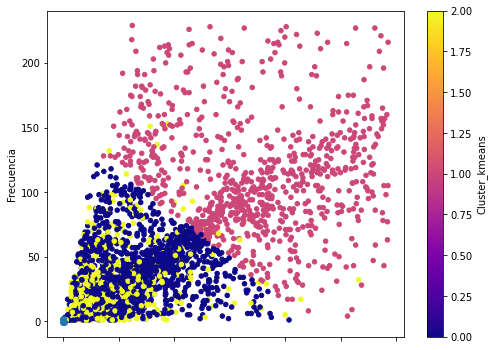

In [41]:
kmeans = KMeans(n_clusters = 3, 
                  init = 'k-means++', 
                  max_iter = 8, 
                  n_init = 10, 
                  random_state = 0)

kmeans.fit(rfm_escalado)
print(kmeans.inertia_)
etiquetas = kmeans.labels_
# Grafico de dispersión
df_limpio_final['Cluster_kmeans'] = etiquetas
df_limpio_final.plot.scatter(x='Monto', y='Frecuencia', c='Cluster_kmeans', colormap='plasma', figsize=(8,6))
print(kmeans.cluster_centers_)
v_c0 = kmeans.cluster_centers_[:,2]
v_c1 = kmeans.cluster_centers_[:,1]
print(v_c0[:,np.newaxis])
print(v_c1[:,np.newaxis])
plt.scatter(x=v_c0[:,np.newaxis], y=v_c1[:,np.newaxis])

In [42]:
df_limpio_final.keys()

Index(['Monto', 'Frecuencia', 'Recencia', 'Cluster_kmeans'], dtype='object')

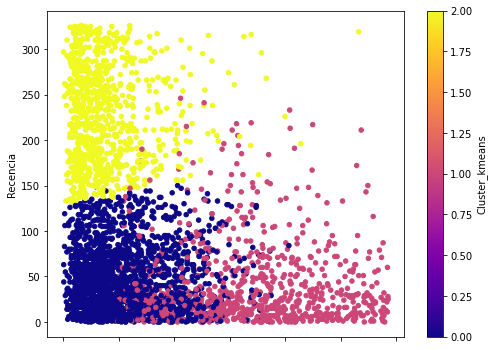

In [43]:
df_limpio_final.plot.scatter(x='Monto', y='Recencia', c='Cluster_kmeans', colormap='plasma', figsize=(8,6))

[[1]
 [1]
 [2]
 ...
 [2]
 [0]
 [1]]
[[-0.33251173 -0.34576769 -0.48140032]
 [ 1.39414549  1.40046205 -0.56397694]
 [-0.58917606 -0.56739436  1.52008473]]
[[-0.34576769]
 [ 1.40046205]
 [-0.56739436]]
[[-0.48140032]
 [-0.56397694]
 [ 1.52008473]]


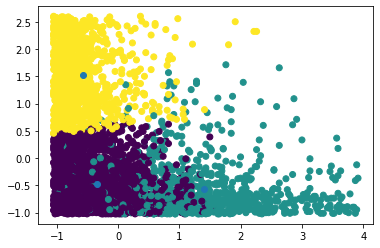

In [44]:
v0 = rfm_escalado[:,0]
v1 = rfm_escalado[:,1]
v2 = rfm_escalado[:,2]
df_data = pd.DataFrame(rfm_escalado)
print(etiquetas[:,np.newaxis])
plt.scatter(x=v1, y=v2, c=etiquetas)
print(kmeans.cluster_centers_)
v_c0 = kmeans.cluster_centers_[:,1]
v_c1 = kmeans.cluster_centers_[:,2]
print(v_c0[:,np.newaxis])
print(v_c1[:,np.newaxis])
plt.scatter(x=v_c0[:,np.newaxis], y=v_c1[:,np.newaxis])

In [45]:
for i in range(1,21):
  kmeans = KMeans(n_clusters = 2, 
                  init = 'k-means++', 
                  max_iter = i, 
                  n_init = 10, 
                  random_state = 0)

  kmeans.fit(rfm_escalado)
  df_limpio_final['Cluster_kmeans'] = etiquetas
  print(kmeans.inertia_)

6003.620623650917
5968.480525552815
5964.471115217314
5963.81807128378
5963.713471937694
5963.495960107909
5963.495960107909
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592
5963.466260979592


In [46]:
df_limpio_final.groupby('Cluster_kmeans').agg('mean')

,Monto,Frecuencia,Recencia
Cluster_kmeans,,,
0,557.516947,33.478927,48.922824
1,1712.607054,113.801498,41.315855
2,384.361073,23.237443,228.853881


### 4.2 Hierarchical Clustering

La familia de clústers jerárquicos, agrupa las observaciones de forma iterativa hasta alcanzar un solo cluster final. El usuario es el encargado de seleccionar el número de clusters deseados al final.

En principio, cada observación es en si misma un cluster. En una segunda etapa, se agrupan las observaciones más cercanas en función de un criterio de agrupamiento de la siguiente lista:


* **Ward** minimiza la suma de cuadrados de la diferencias dentro de los clusters. Es un enfoque de minimización de la varianza y, en ese sentido, actua de forma similar a K-Means.
* **Maximum or complete linkage** minimiza la distancia máxima entre un par de clusters.
* **Average linkage** minimiza el promedio de las distancias entre todas las observaciones de un par de clusters.
* **Single linkage** minimiza la distancia entre las observaciones más cercanas de un par de clusters.



Usando Scikit-learn, debemos primero importar la instancia de ```sklearn.cluster.AgglomerativeClustering```, e invocar los métodos necesarios:

1. Preparar los datos X
2. Crear instancia de ```sklearn.cluster.AgglomerativeClustering```:

``` python
hc = AgglomerativeClustering(linkage    = "ward", 
                             affinity   = "euclidean"
                             n_clusters = 3
                            )
```
3. Entrenar:
```
hc.fit(X)
```
4. Identificar etiquetas de clasificación:
```
hc.labels_
```

A continuación describiremos los argumentos más comunes:


---
```
sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, 
connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, distance_threshold=None)
```

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

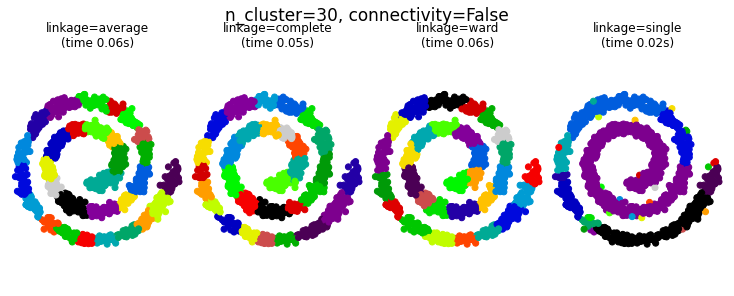

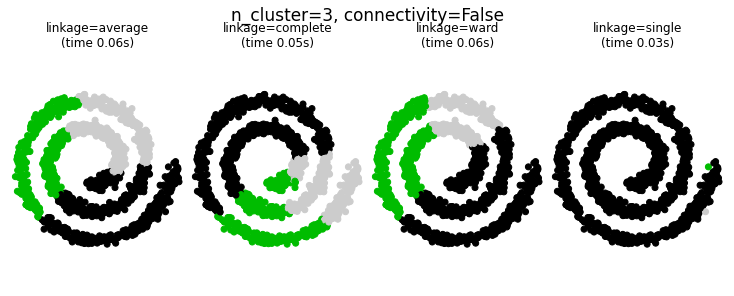

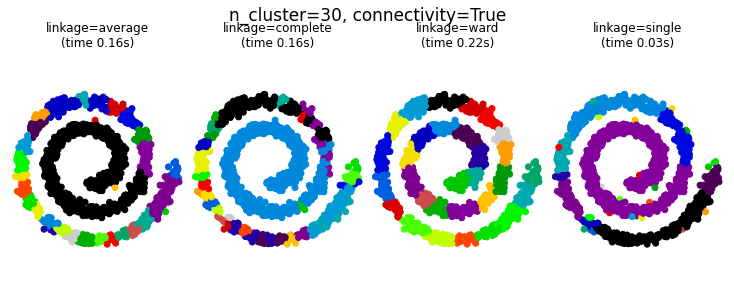

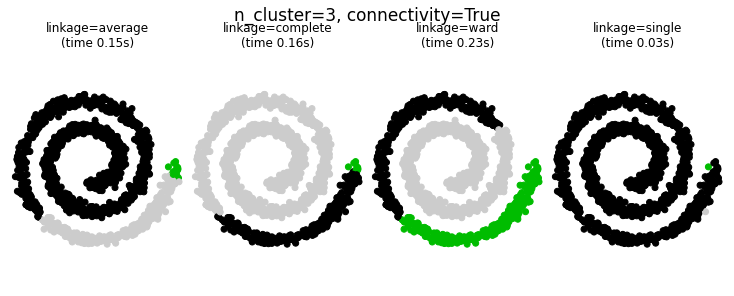

In [47]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()

**Visualización dendogramas**

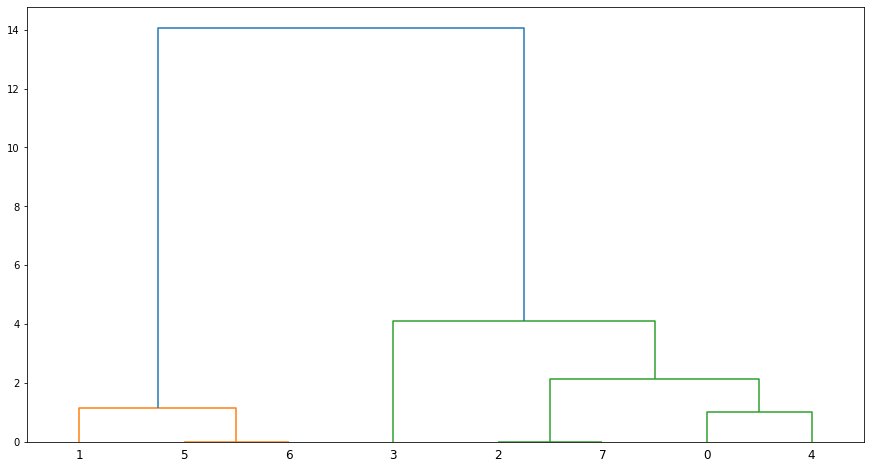

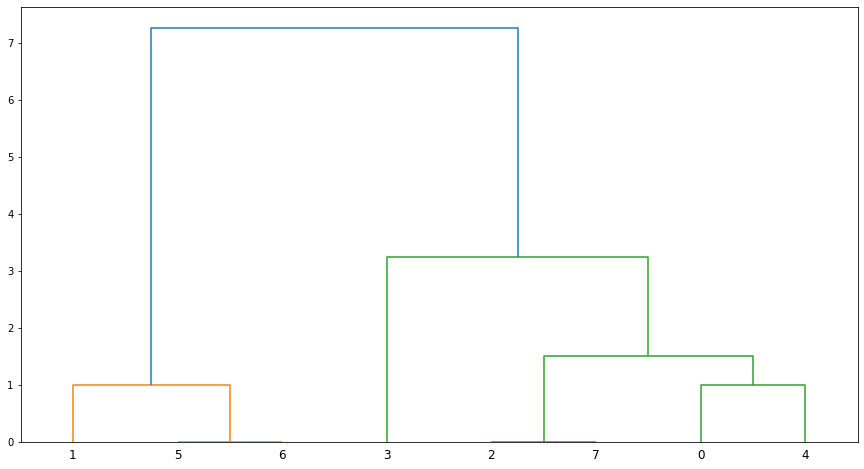

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
Z = linkage(X, 'average')
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

[[ 1.52405355 -0.39826977 -0.20202967]
 [ 1.4646896   0.51679377 -0.82480002]
 [-0.66390237 -0.70329094  2.41138163]
 ...
 [-1.04317957 -0.92116322  0.97678564]
 [-0.89775358 -0.81222708 -0.94712991]
 [ 1.583941    0.45143209 -0.55789844]]


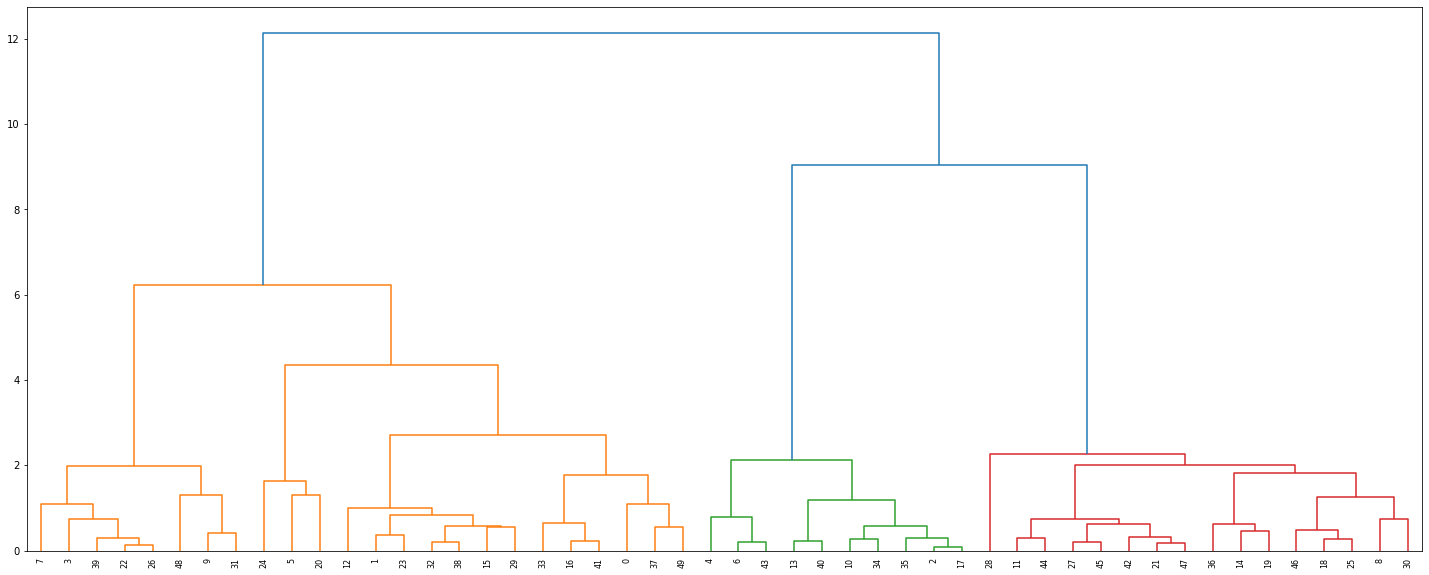

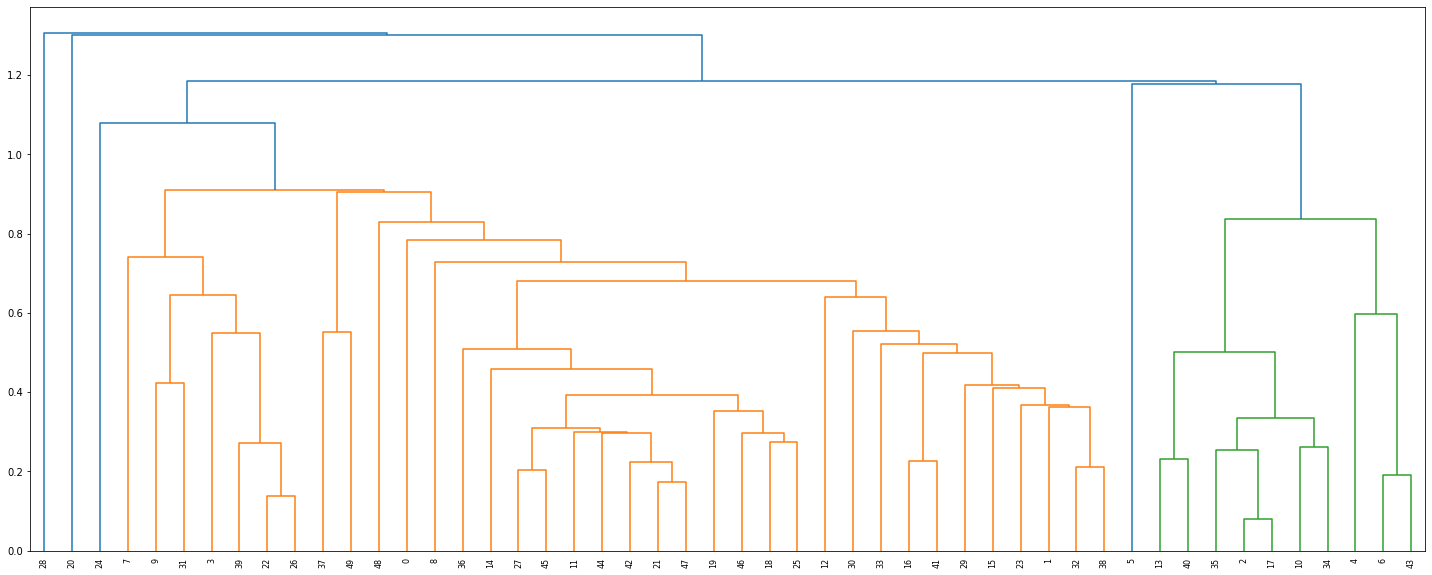

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
print(rfm_escalado)
#ward_euclidian = linkage(y = rfm_escalado, method="ward", metric='euclidean')
Z = linkage(rfm_escalado[:50], 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
Z = linkage(rfm_escalado[:50], 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()


In [105]:
print(rfm_escalado[26],rfm_escalado[22],rfm_escalado[28])

[ 2.99494552  1.1050489  -0.85816272] [ 2.91141121  1.19219781 -0.79143732] [-0.47471247  1.1050489  -0.79143732]


#### Aplicación clusterización jerárquica

In [112]:
hc = AgglomerativeClustering(linkage    = "ward", 
                             affinity   = "euclidean",
                             n_clusters = 3)
hc.fit(rfm_escalado)

AgglomerativeClustering(n_clusters=3)

In [114]:
etiquetas_hc = hc.labels_
etiquetas_hc

array([0, 0, 1, ..., 1, 2, 0])

**Visualización por cluster**

In [115]:
# Creación de una nueva columna en el dataframe con las etiquetas
df_limpio_final['Cluster_hc'] = etiquetas_hc
df_limpio_final.head()

,Monto,Frecuencia,Recencia,Cluster_hc
CustomerID,,,,
12348.0,1797.24,31,74,0
12349.0,1757.55,73,18,0
12350.0,334.40,17,309,1
12352.0,2506.04,85,35,0
12353.0,89.00,4,203,1


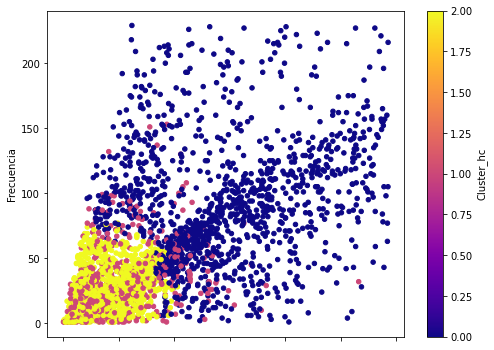

In [116]:
# Gráfico de dispersion
df_limpio_final.plot.scatter(x='Monto', y='Frecuencia', c='Cluster_hc', colormap='plasma', figsize=(8,6))

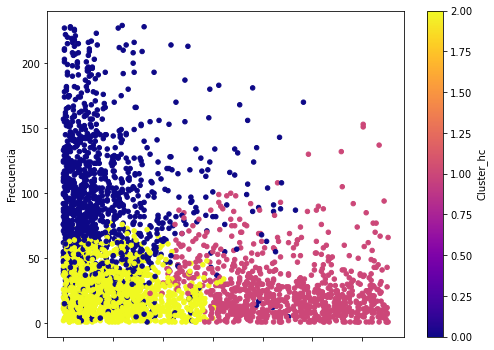

In [117]:
# Gráfico de dispersion
df_limpio_final.plot.scatter(x='Recencia', y='Frecuencia', c='Cluster_hc', colormap='plasma', figsize=(8,6))

In [123]:
df_limpio_final[df_limpio_final['Cluster_hc'] == 0].values[:,0]

array([1797.24, 1757.55, 2506.04, ..., 2643.2 , 1213.16, 1837.28])

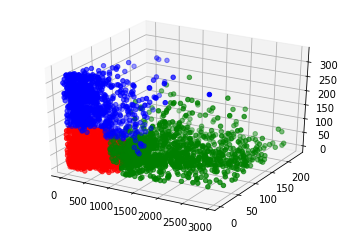

In [125]:
# Scatter

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos de prueba
x = df_limpio_final[df_limpio_final['Cluster_hc'] == 0].values[:,0]
y = df_limpio_final[df_limpio_final['Cluster_hc'] == 0].values[:,1]
z = df_limpio_final[df_limpio_final['Cluster_hc'] == 0].values[:,2]

# Datos adicionales
x1 = df_limpio_final[df_limpio_final['Cluster_hc'] == 1].values[:,0]
y1 = df_limpio_final[df_limpio_final['Cluster_hc'] == 1].values[:,1]
z1 = df_limpio_final[df_limpio_final['Cluster_hc'] == 1].values[:,2]
# Datos adicionales
x2 = df_limpio_final[df_limpio_final['Cluster_hc'] == 2].values[:,0]
y2 = df_limpio_final[df_limpio_final['Cluster_hc'] == 2].values[:,1]
z2 = df_limpio_final[df_limpio_final['Cluster_hc'] == 2].values[:,2]

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x1, y1, z1, c='b', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

# Mostramos el gráfico
plt.show()

In [127]:
df_limpio_final.keys()

Index(['Monto', 'Frecuencia', 'Recencia', 'Cluster_hc'], dtype='object')

In [130]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df_limpio_final, x='Monto', y='Frecuencia', z='Recencia',
              color='Cluster_hc',opacity=0.7)
fig.show()

In [ ]:
df_limpio_final.groupby('Cluster_hc').agg('mean').iloc[:, 0:3]

>**Ejercicio:** 

1. Aplicar la clusterización KMeans de los datos RFM estandarizados `rfm_escalado`. Determinando la existencia de 3 clústers, obtenga las etiquetas correspondientes para cada cliente y realice las visualizaciones para interpretar cada clúster. Parámetros: `n_clusters = 3, init=’k-means++’, n_init=10, max_iter=300, random_state=0`

2. Aplicar la clusterización Hierarchical Clustering de los datos RFM estandarizados `rfm_escalado`. Empleando la distancia euclídea y la forma de cálculo (linkage) sea `complete` realice la clusterización jerárquica con 4 clústers. Por último, realice las visualizaciones para interpretar cada clúster. Parámetros = `linkage = "complete", affinity = "euclidean", n_clusters = 4`

In [ ]:
# Su codigo aquí

### Solución

In [ ]:
#Kmean
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 0)
kmeans.fit(rfm_escalado)
df_limpio_final['km_labels_3'] = kmeans.labels_
df_limpio_final.plot.scatter(x='Frecuencia', y='Recencia', c='km_labels_3', colormap='plasma', figsize=(8,6))

In [ ]:
#HC
hc = AgglomerativeClustering(linkage    = "complete", 
                             affinity   = "euclidean",
                             n_clusters = 4)
hc.fit(rfm_escalado)
df_limpio_final['hc_labels_4'] = hc.labels_
df_limpio_final.plot.scatter(x='Monto', y='Recencia', c='hc_labels_4', colormap='plasma', figsize=(8,6))

### Fin



<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>